In [5]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import asammdf
Signal = asammdf.Signal
import numpy as np
import py
import get_files
import uuid
%matplotlib inline

In [7]:
%%file MDF2.py
import asammdf
def _path(self):
    return py.path.local(self._file.name)

def __repr__(self):
    return "MDF<{}, v={}>".format(self._path.basename, self.version)

# Dunctions to extend MDF with.
extend = {
    "__repr__": __repr__,
    "_path": property(_path),
}
MDF2 = type("MDF2", (asammdf.MDF, ), extend)

Overwriting MDF2.py


In [8]:
from MDF2 import MDF2

In [12]:
from signal_generators import *

In [16]:
import time

In [21]:
t0 = time.time()
T = np.zeros(0)

In [29]:
T = np.append(T, t0)

In [20]:
signals = list()
signal0 = Signal(
    samples=sine(t0),
    timestamps=t0,
    name="sine",
    unit="",
)

In [21]:
signals = [signal0]

In [22]:
mdf = MDF2(
    version='4.11',
)
mdf.append(
    signals=signals,
    common_timebase=False,
)
o = mdf.save(
    dst="log_data",
    overwrite=True,
    compression=2,
)
print(o)

log_data.mf4


In [23]:
class SignalBuffer():
    def __init__(self, buffer=100):
        self.buffer = buffer
        self.index=0
        self.uuid=uuid.uuid4()
        self.timestamps=np.zeros([self.buffer])
        self.samples=np.zeros([self.buffer])
        
    def append(self, timestamp, sample):
        try:
            self.timestamps[self.index] = timestamp
            self.samples[self.index] = sample
            self.index+=1
        except:
            raise
            
    @property
    def _signal(self):
        signal_ = asammdf.Signal(
            timestamps=self.timestamps,
            samples=self.samples,
            name=self.uuid,
            unit="",
            comment="buffer"
        )
        return signal_
            
    @property
    def _free(self):
        return self.buffer-self.index
        
    def __repr__(self):
        return "SignalBuffer<free={}>".format(self._free)

In [24]:
sine_buffer = SignalBuffer()

In [26]:
buffer_time = 5 # seconds
# Bootstrap time
t0=np.arange(0, buffer_time, 1e-3, dtype=np.float32)
# Faux Time
t1=np.arange(buffer_time, 2*buffer_time, 1e-3, dtype=np.float32)

In [27]:
signals = list()

0

In [30]:
idx=0

signal0 = Signal(
    samples=sine(t0),
    timestamps=t0,
    name="sine",
    unit="",
)

sine_buffer = SignalBuffer()
for t in t1:
    if sine_buffer._free<1:
        signal0 = signal0.extend(sine_buffer._signal)
        
        signals = [
            signal0
        ]
        mdf = MDF2(
            version='4.11',
        )
        signals
        mdf.append(
            signals=signals,
            common_timebase=False,
        )

        o = mdf.save(
            dst="log_data_{}".format(idx),
            overwrite=True,
            compression=2,
        )
        idx+=1
        sine_buffer = SignalBuffer()
    
    sine_buffer.append(t, sine(t))
signal0 = signal0.extend(sine_buffer._signal)

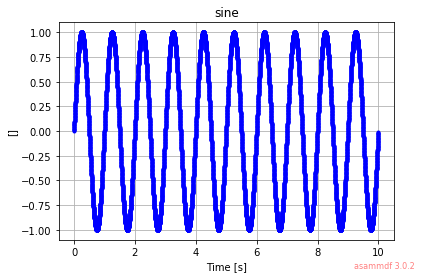

In [32]:
signal0.plot()